In [59]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import math
import seaborn as sb
from scipy.stats import iqr
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

In [69]:
df=pd.read_csv("ParisHousingClass.csv")
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9,Basic
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0,Basic
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,Basic
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0,Basic


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

### Data cleaning

In [62]:
df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

In [63]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = df[(df['price'] < Q1 - threshold * IQR) | (df['price'] > Q3 + threshold * IQR)]

In [64]:
outliers

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category


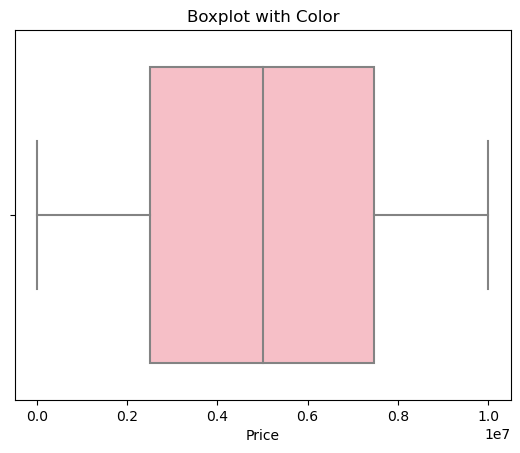

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a 'price' column
sns.boxplot(x=df['price'], color='lightpink')

# Add title and labels
plt.title('Boxplot with Color')
plt.xlabel('Price')
plt.show()
   

In [66]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame with a 'price' column
df = pd.DataFrame(df['price'])

# Create a boxplot with Plotly Express
fig = px.box(df, x='price', points='all', title='Boxplot of Price')


# Show the plot
fig.show()


In [67]:
len(df)-len(df.drop_duplicates())

0

Text(0, 0.5, '')

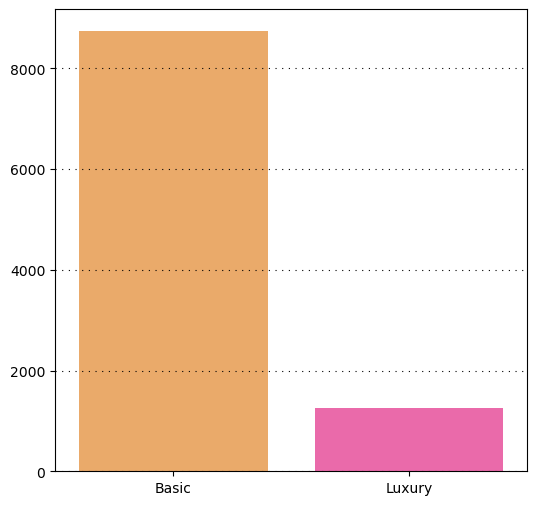

In [70]:
fig = plt.figure(figsize=(14, 6))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3)
ax1 = fig.add_subplot(gs[0, 1])
sns.countplot(x='category', data=df, ax=ax1, palette='spring_r')
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax1.set_xlabel('')
ax1.set_ylabel('')

In [71]:
df['category'].value_counts()

Basic     8735
Luxury    1265
Name: category, dtype: int64

In [72]:
pd.crosstab(df['category'], df['hasYard'], margins=True).style.background_gradient(cmap="YlGnBu")

hasYard,0,1,All
category,,,
Basic,4913,3822,8735
Luxury,0,1265,1265
All,4913,5087,10000


<Axes: xlabel='hasYard', ylabel='count'>

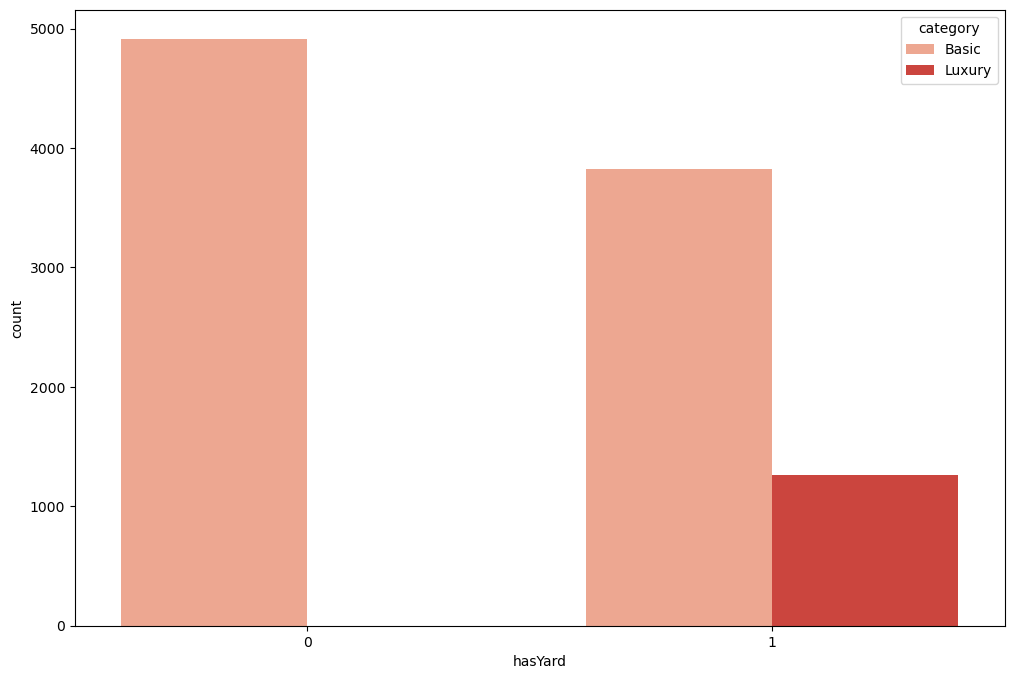

In [73]:
plt.figure(figsize=(12,8))
sns.countplot(x='hasYard', data=df, hue='category',  palette='Reds')

<Axes: ylabel='hasPool'>

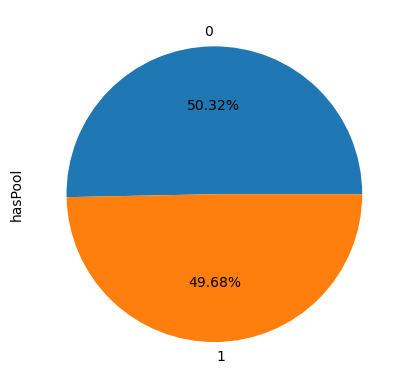

In [74]:
df['hasPool'].value_counts(normalize = True).plot.pie(autopct = '%.2f%%')

In [75]:
pd.crosstab(df['category'], df['hasPool'], margins=True).style.background_gradient(cmap="YlGnBu")

hasPool,0,1,All
category,,,
Basic,5032,3703,8735
Luxury,0,1265,1265
All,5032,4968,10000


<Axes: xlabel='hasPool', ylabel='count'>

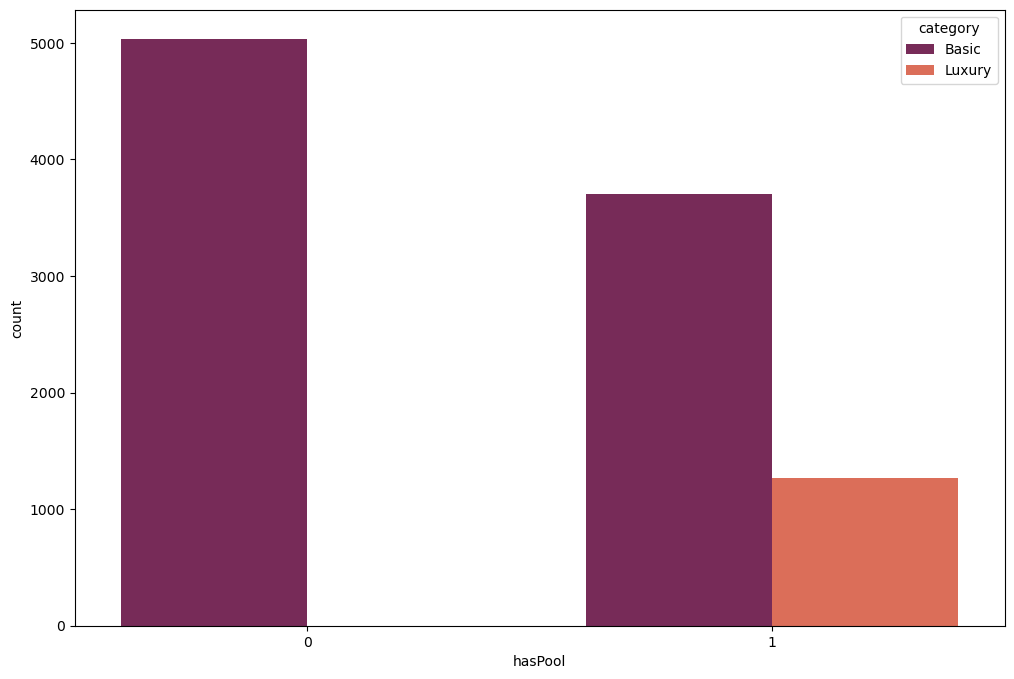

In [76]:
plt.figure(figsize=(12,8))
sns.countplot(x='hasPool', data=df, hue='category',  palette='rocket')

<Axes: xlabel='cityPartRange', ylabel='count'>

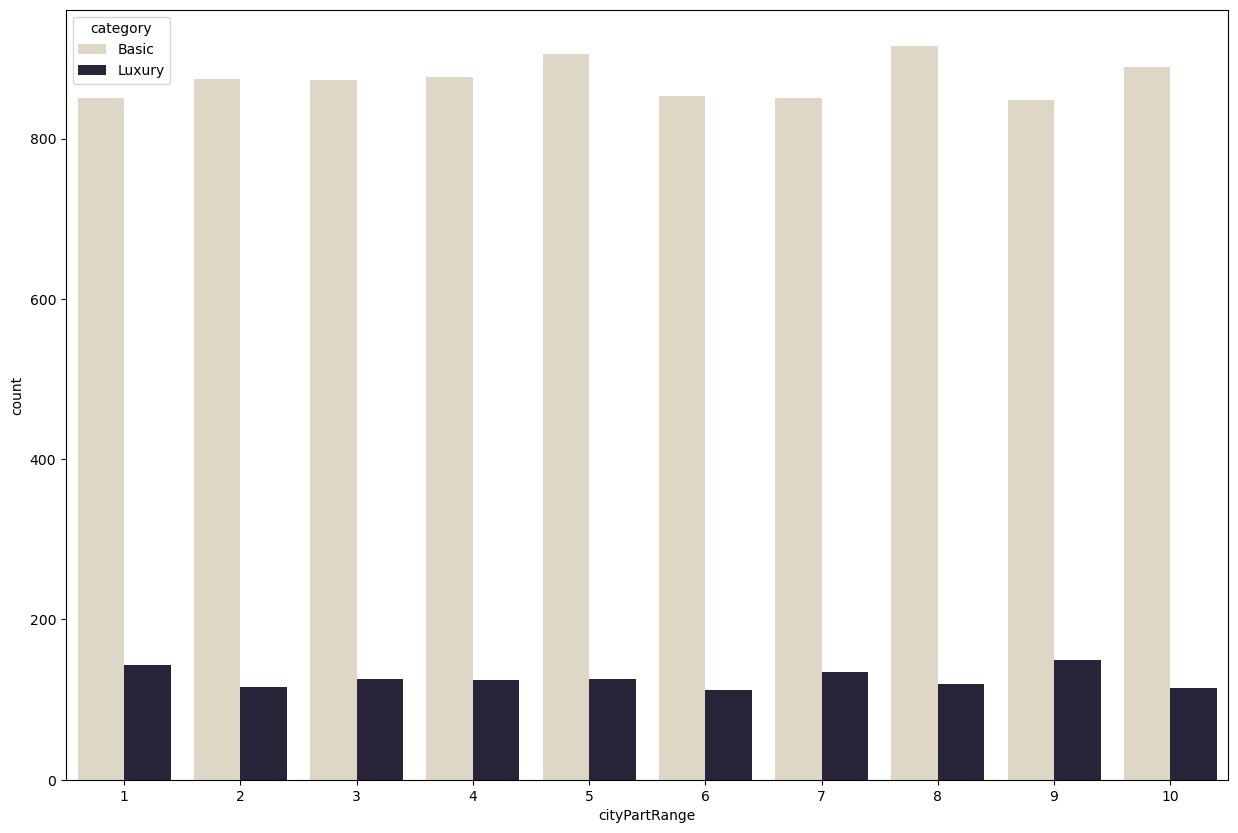

In [77]:
plt.figure(figsize=(15,10))
sns.countplot(x='cityPartRange', data=df, hue='category',  palette='ch:s=-.2,r=.6')

In [78]:
pd.crosstab(df['category'], df['cityPartRange'], margins=True).style.background_gradient(cmap="YlGnBu")

cityPartRange,1,2,3,4,5,6,7,8,9,10,All
category,,,,,,,,,,,
Basic,851,874,873,877,905,853,850,915,848,889,8735
Luxury,143,116,126,124,126,112,134,120,149,115,1265
All,994,990,999,1001,1031,965,984,1035,997,1004,10000


<Axes: xlabel='numPrevOwners', ylabel='count'>

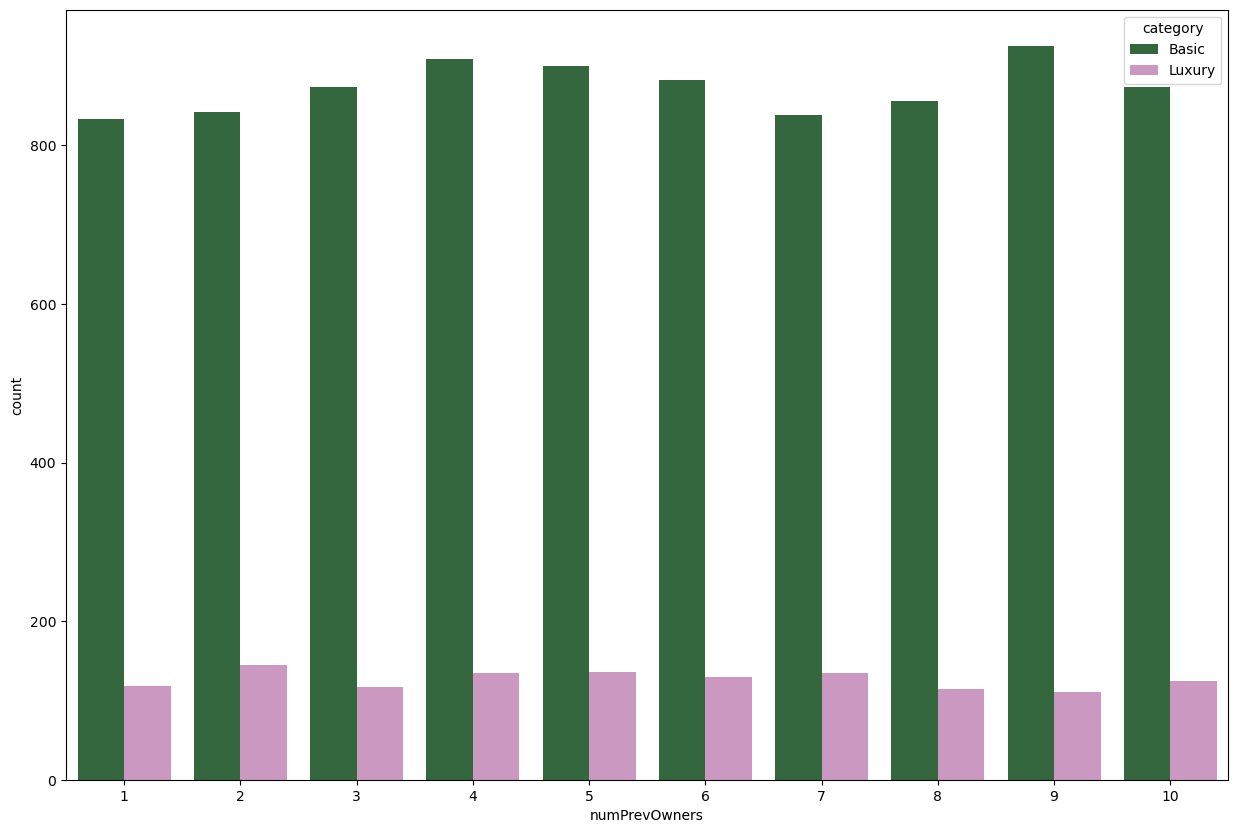

In [79]:
plt.figure(figsize=(15,10))
sns.countplot(x='numPrevOwners', data=df, hue='category',  palette='cubehelix')

In [80]:
pd.crosstab(df['category'], df['numPrevOwners'], margins=True).style.background_gradient(cmap="YlGnBu")

numPrevOwners,1,2,3,4,5,6,7,8,9,10,All
category,,,,,,,,,,,
Basic,834,842,874,909,900,882,839,856,925,874,8735
Luxury,118,145,117,134,136,129,135,115,111,125,1265
All,952,987,991,1043,1036,1011,974,971,1036,999,10000


In [81]:
pd.crosstab(df['category'], df['isNewBuilt'], margins=True).style.background_gradient(cmap="YlGnBu")

isNewBuilt,0,1,All
category,,,
Basic,5009,3726,8735
Luxury,0,1265,1265
All,5009,4991,10000


<Axes: xlabel='isNewBuilt', ylabel='count'>

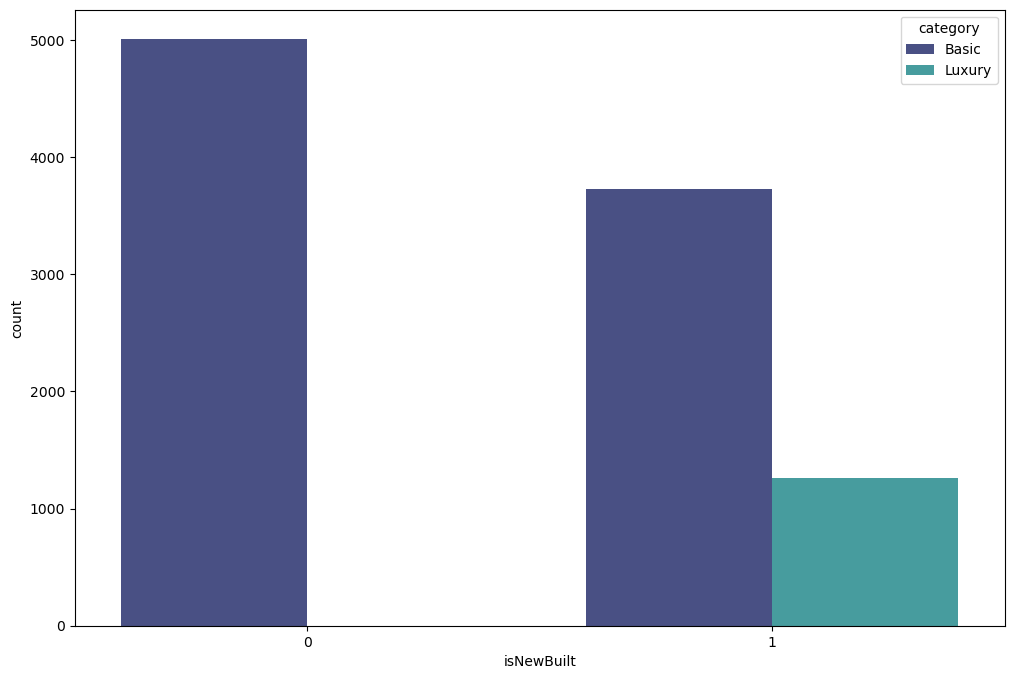

In [82]:
plt.figure(figsize=(12,8))
sns.countplot(x='isNewBuilt', data=df, hue='category',  palette='mako')

In [83]:
pd.crosstab(df['category'], df['hasStormProtector'], margins=True).style.background_gradient(cmap="YlGnBu")

hasStormProtector,0,1,All
category,,,
Basic,4372,4363,8735
Luxury,629,636,1265
All,5001,4999,10000


<Axes: xlabel='hasStormProtector', ylabel='count'>

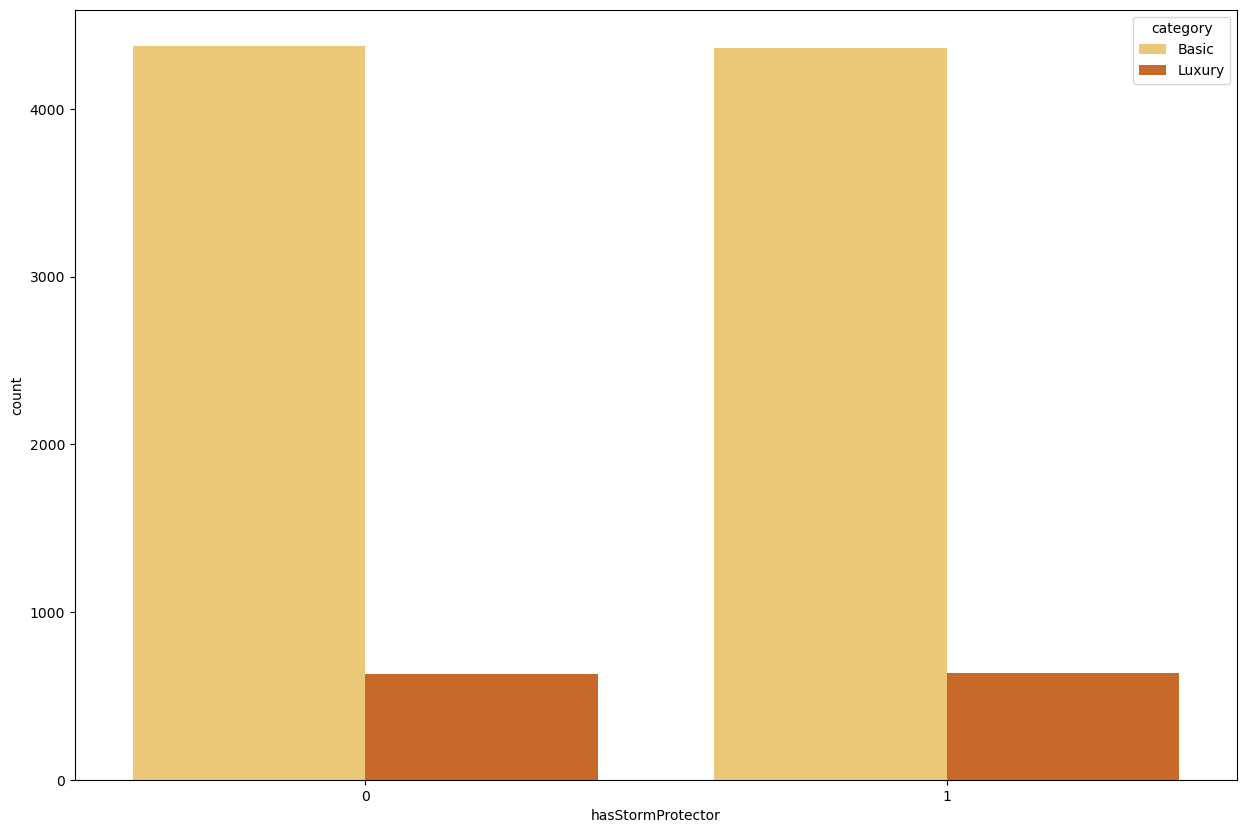

In [84]:
plt.figure(figsize=(15,10))
sns.countplot(x='hasStormProtector', data=df, hue='category',  palette='YlOrBr')

In [85]:
pd.crosstab(df['category'], df['hasStorageRoom'], margins=True).style.background_gradient(cmap="YlGnBu")

hasStorageRoom,0,1,All
category,,,
Basic,4345,4390,8735
Luxury,625,640,1265
All,4970,5030,10000


<Axes: xlabel='hasStorageRoom', ylabel='count'>

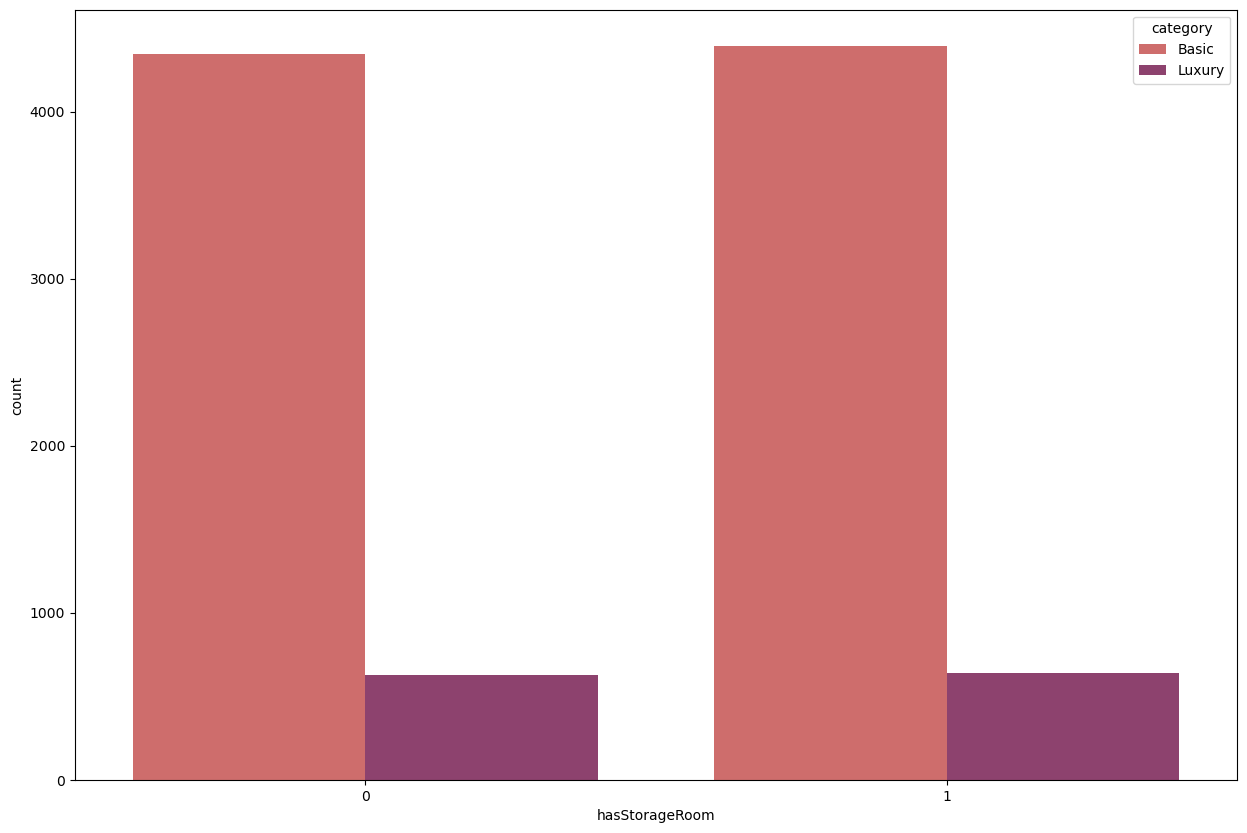

In [86]:
plt.figure(figsize=(15,10))
sns.countplot(x='hasStorageRoom', data=df, hue='category',  palette='flare')

In [87]:
pd.crosstab(df['category'], df['hasGuestRoom'],margins=True).style.background_gradient(cmap="YlGnBu")

hasGuestRoom,0,1,2,3,4,5,6,7,8,9,10,All
category,,,,,,,,,,,,
Basic,809,795,809,782,806,764,803,769,791,807,800,8735
Luxury,105,115,133,124,105,110,101,115,122,109,126,1265
All,914,910,942,906,911,874,904,884,913,916,926,10000


<Axes: xlabel='hasGuestRoom', ylabel='count'>

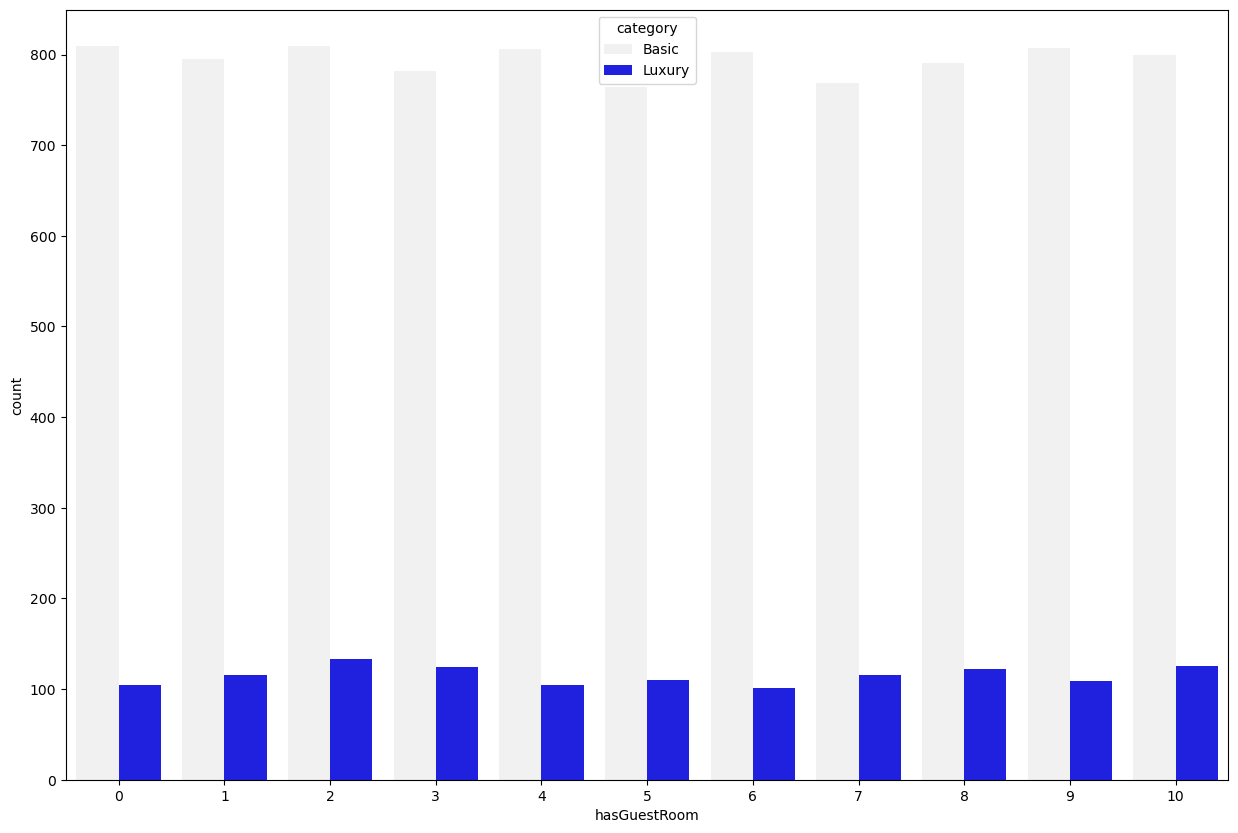

In [88]:
plt.figure(figsize=(15,10))
sns.countplot(x='hasGuestRoom', data=df, hue='category',  palette='light:b')

<Axes: >

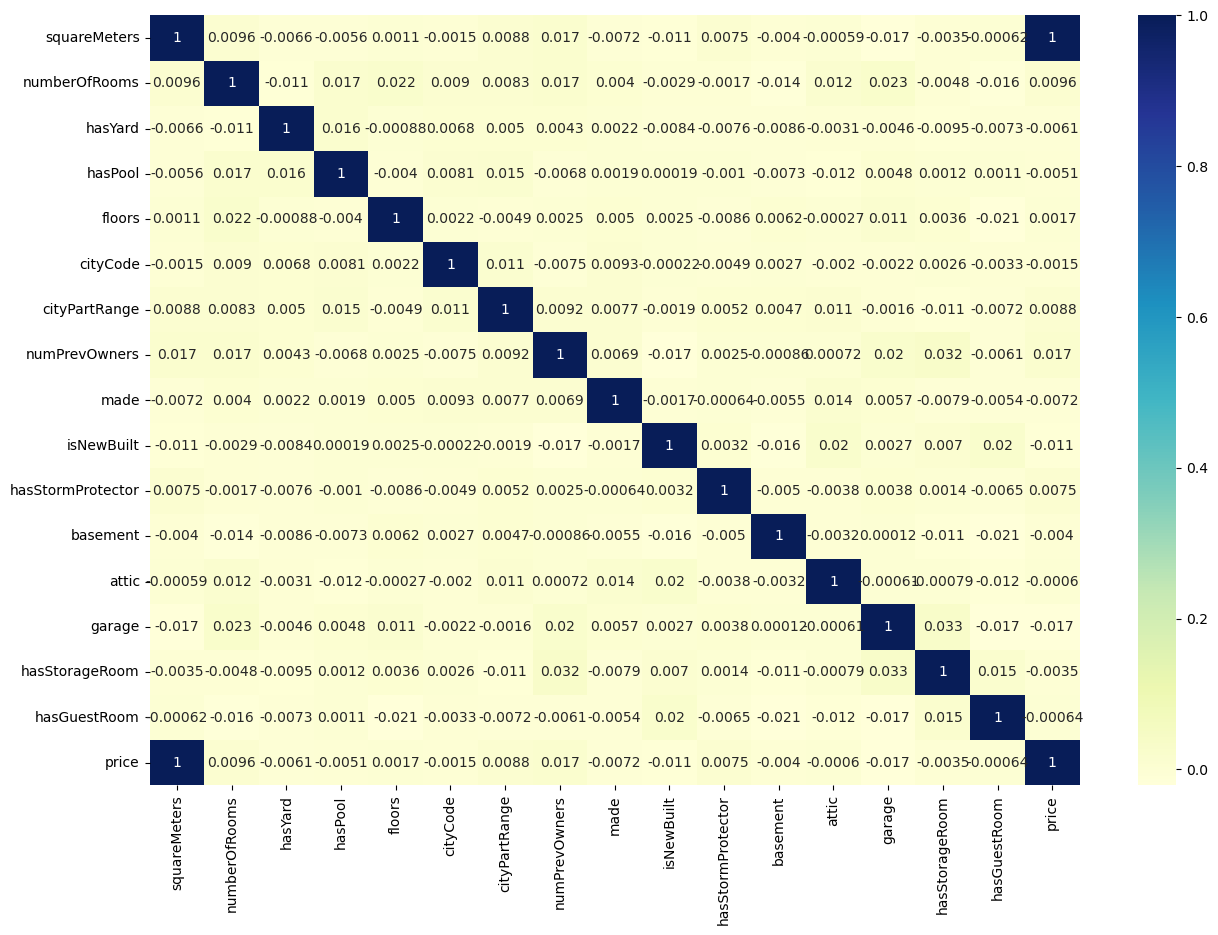

In [89]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr() , annot = True,cmap="YlGnBu")

In [90]:
### to handle the noise data we will create bins this below graph shows the distribution of the data 

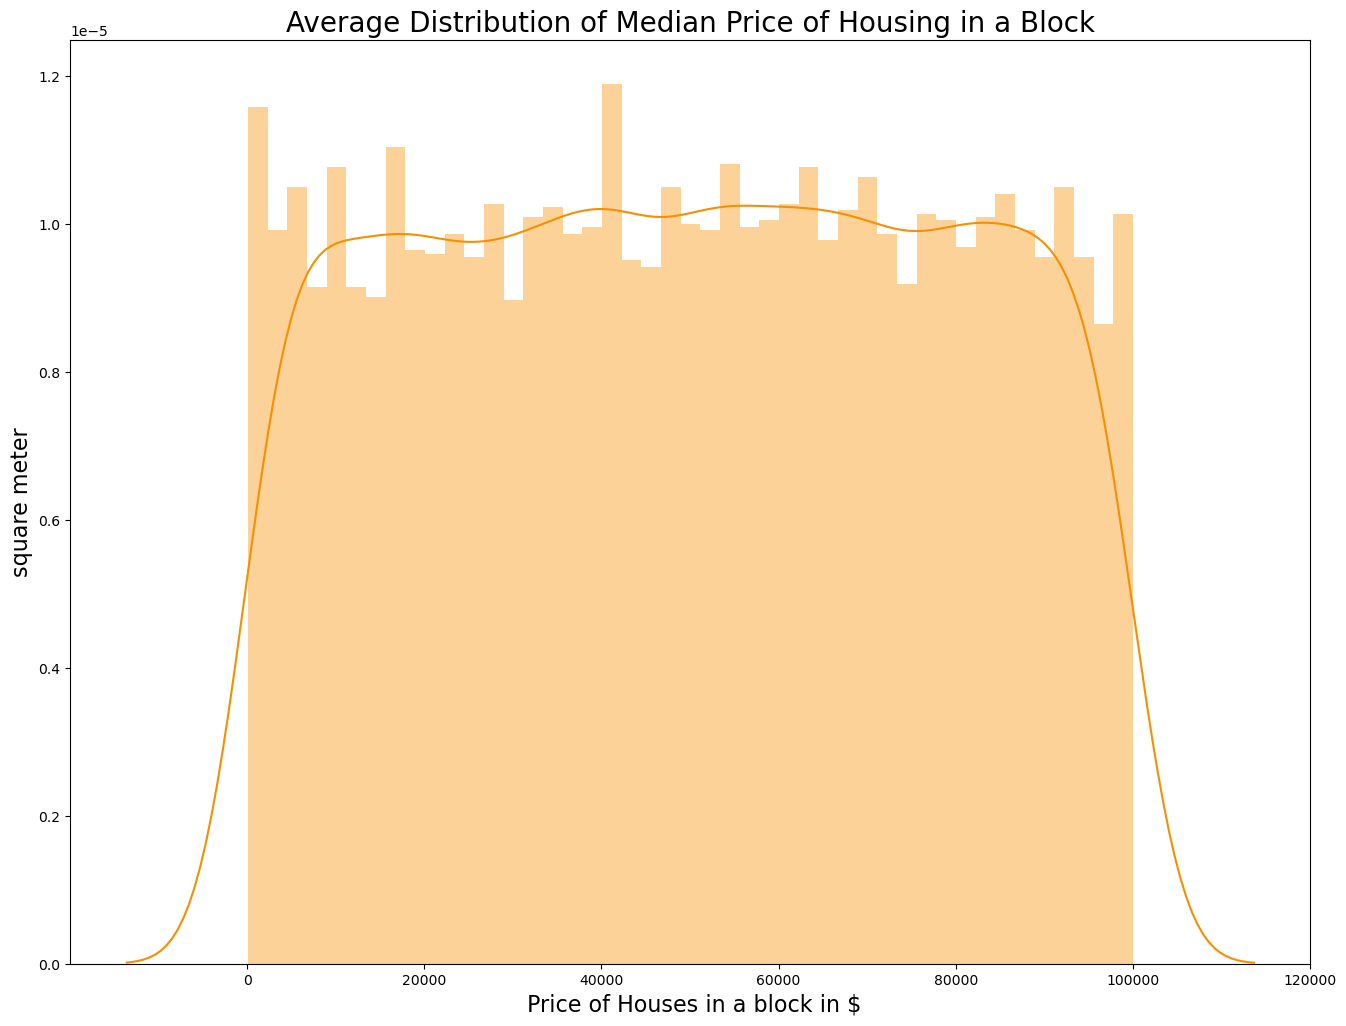

In [91]:
plt.figure(figsize=(16, 12))
sns.distplot(df.squareMeters, bins = 45, color = '#f88f01', hist = True)
plt.xlabel(' Price of Houses in a block in $', fontsize=16)
plt.ylabel('square meter', fontsize=16)
plt.title('Average Distribution of Median Price of Housing in a Block', fontsize=20)
plt.show()

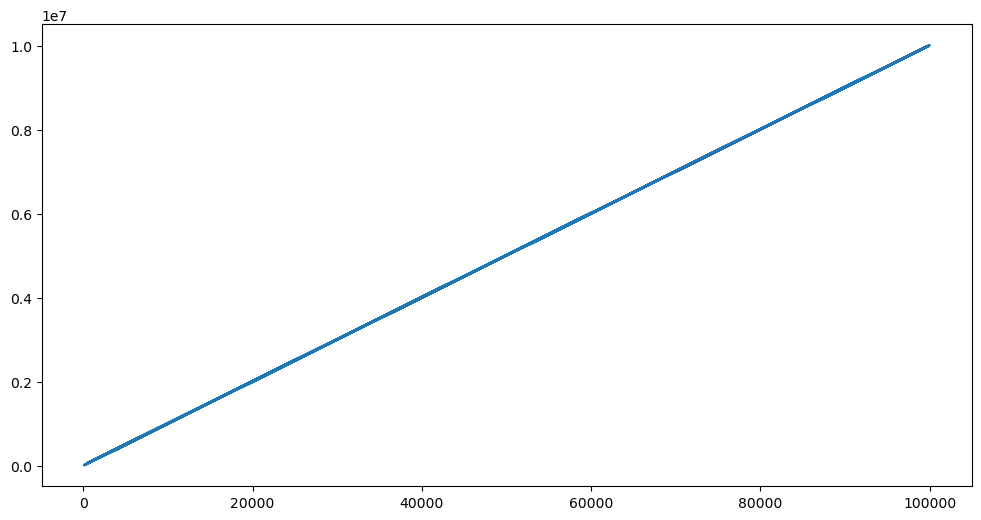

In [92]:
plt.figure(figsize=(12,6))
plt.plot(df['squareMeters'], df['price'])

<Axes: xlabel='category', ylabel='price'>

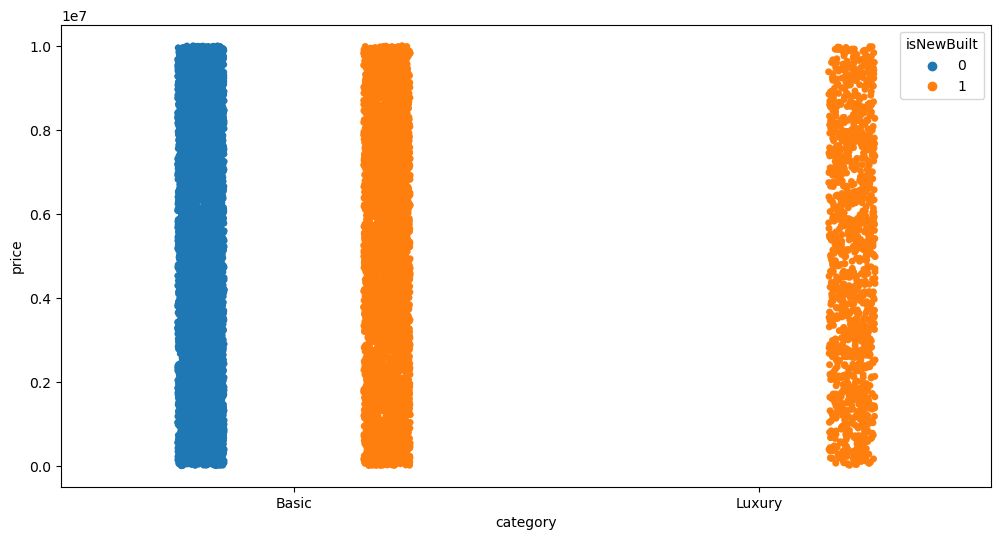

In [93]:
plt.figure(figsize=(12,6))
sns.stripplot(x='category', y='price', data=df,
              jitter=True, hue='isNewBuilt', dodge=True)

squareMeters            Axes(0.125,0.786098;0.133621x0.0939024)
numberOfRooms        Axes(0.285345,0.786098;0.133621x0.0939024)
hasYard               Axes(0.44569,0.786098;0.133621x0.0939024)
hasPool              Axes(0.606034,0.786098;0.133621x0.0939024)
floors               Axes(0.766379,0.786098;0.133621x0.0939024)
cityCode                Axes(0.125,0.673415;0.133621x0.0939024)
cityPartRange        Axes(0.285345,0.673415;0.133621x0.0939024)
numPrevOwners         Axes(0.44569,0.673415;0.133621x0.0939024)
made                 Axes(0.606034,0.673415;0.133621x0.0939024)
isNewBuilt           Axes(0.766379,0.673415;0.133621x0.0939024)
hasStormProtector       Axes(0.125,0.560732;0.133621x0.0939024)
basement             Axes(0.285345,0.560732;0.133621x0.0939024)
attic                 Axes(0.44569,0.560732;0.133621x0.0939024)
garage               Axes(0.606034,0.560732;0.133621x0.0939024)
hasStorageRoom       Axes(0.766379,0.560732;0.133621x0.0939024)
hasGuestRoom            Axes(0.125,0.448

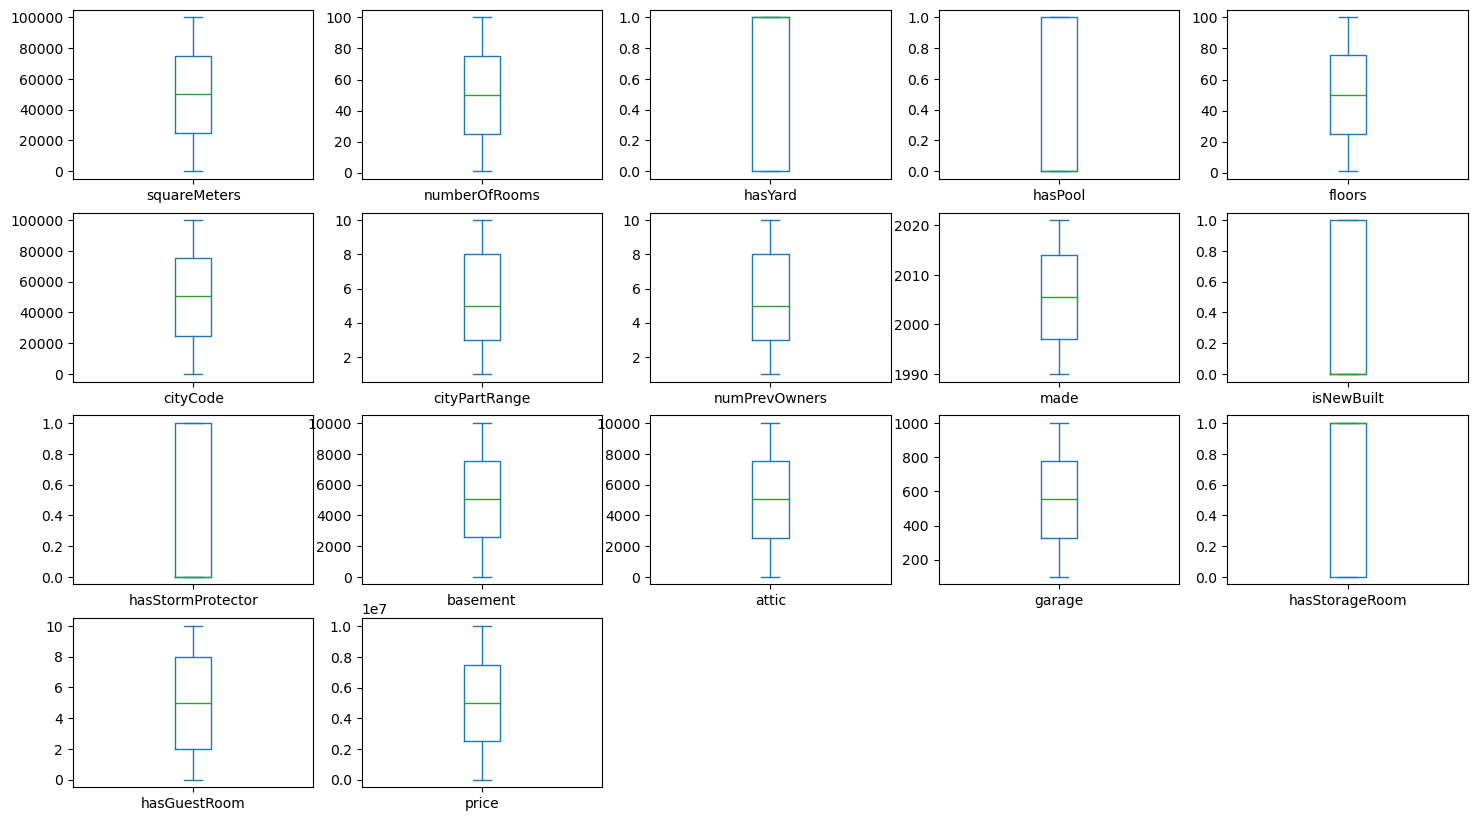

In [94]:
df.plot(kind = "box" , subplots = True , figsize = (18,18), layout = (7,5))

In [95]:
pd.crosstab(df['category'], df['hasStormProtector'],margins=True).style.background_gradient(cmap="YlGnBu")

hasStormProtector,0,1,All
category,,,
Basic,4372,4363,8735
Luxury,629,636,1265
All,5001,4999,10000


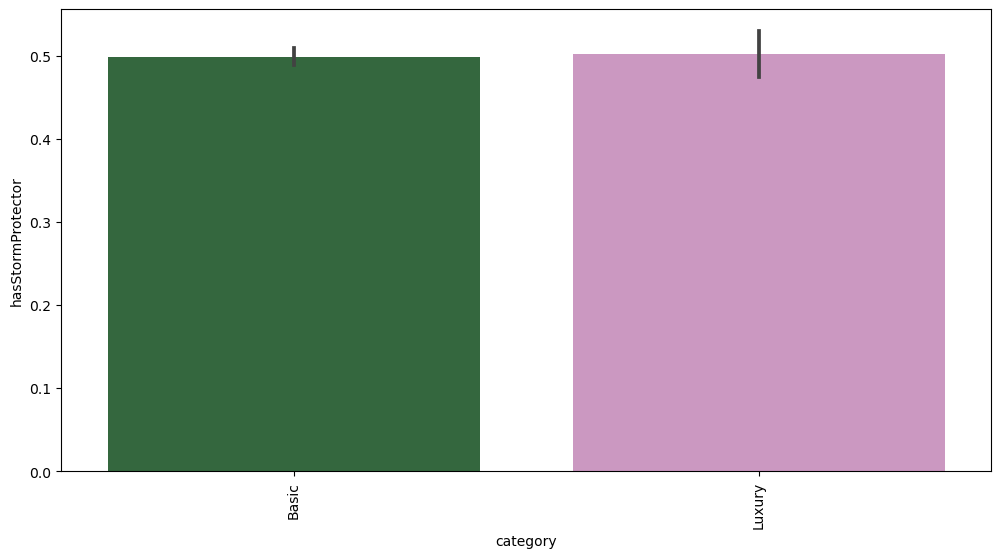

In [96]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['category'],y=df['hasStormProtector'],palette='cubehelix')
plt.xticks(rotation='vertical')
plt.show()

In [97]:
df['made'].value_counts().unique

<bound method Series.unique of 1992    356
2013    352
2020    336
2018    334
2003    332
2001    332
1996    327
1991    324
2009    324
2011    321
2019    321
1993    320
1998    318
1990    317
1994    312
2014    312
2004    307
2016    307
2012    305
2015    305
2021    304
2007    302
2008    302
1997    296
2006    296
2005    296
2000    295
1999    293
2010    291
2002    290
2017    288
1995    285
Name: made, dtype: int64>

<Axes: xlabel='price'>

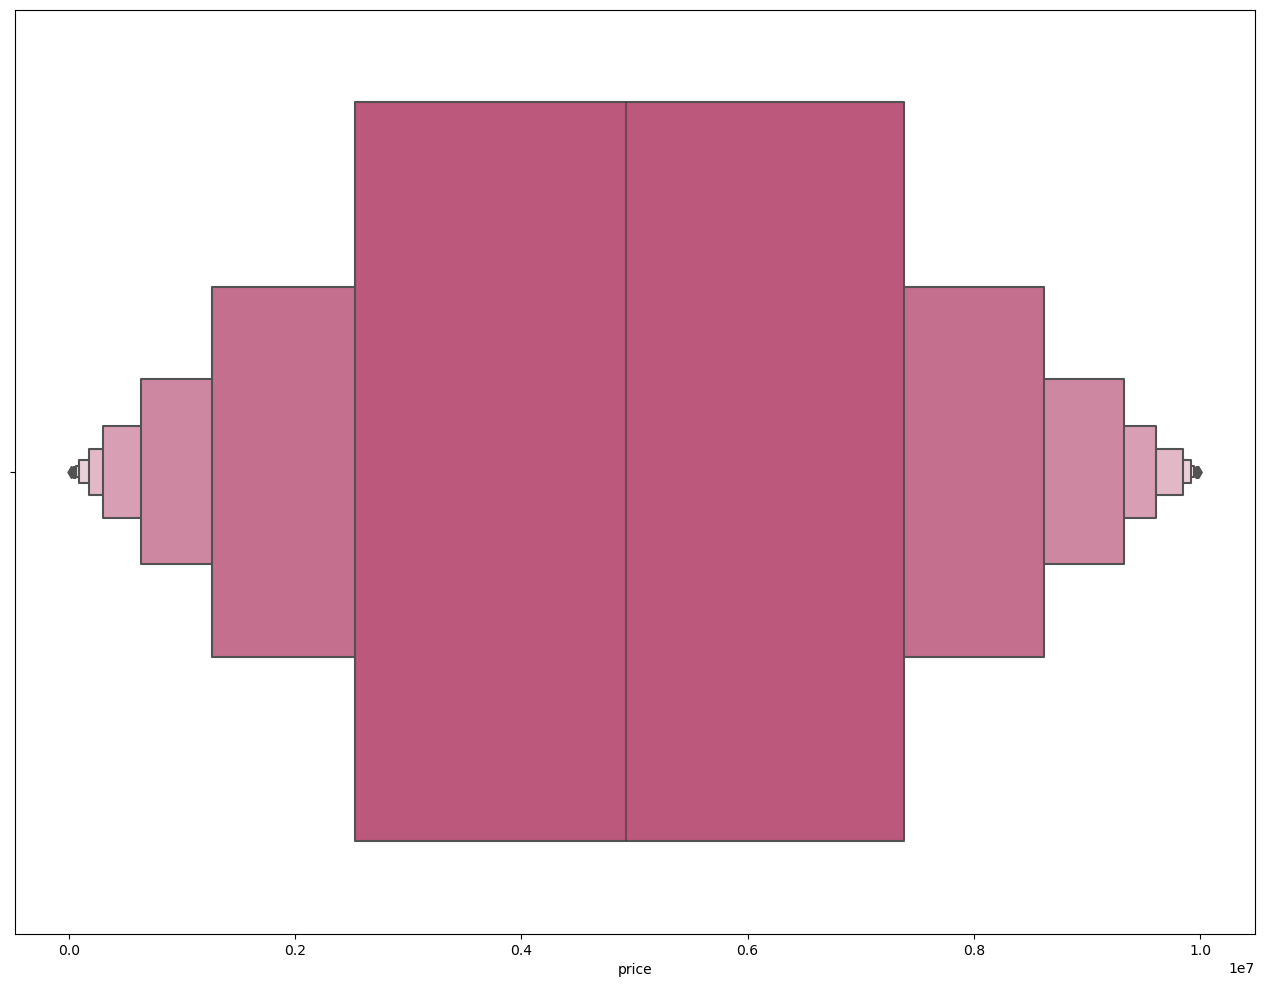

In [98]:
plt.figure(figsize=(16,12))
sns.boxenplot(x="price", data=df[df['category'] == 'Luxury'], palette="plasma")

### transformation

In [99]:
def decimal_scaling(data):
    max_value = np.max(np.abs(data))
    num_digits = len(str(int(max_value)))
    scaling_factor = 10 ** num_digits
    scaled_data = data / scaling_factor
    return scaled_data, scaling_factor
original_data = df['price']
scaled_data, scaling_factor = decimal_scaling(original_data)
print("Original Data   Scaled Data")
print("-" * 30)
for orig, scaled in zip(original_data, scaled_data):
    print(f"{orig:<15} {scaled:.4f}")
print("\nScaling Factor:", scaling_factor)

Original Data   Scaled Data
------------------------------
7559081.5       0.0756
8085989.5       0.0809
5574642.1       0.0557
3232561.2       0.0323
7055052.0       0.0706
3926647.2       0.0393
5876376.5       0.0588
8696869.3       0.0870
5154055.2       0.0515
3970892.1       0.0397
2366397.3       0.0237
9652258.1       0.0965
1914688.8       0.0191
1320803.4       0.0132
7986665.8       0.0799
7607322.9       0.0761
6420823.1       0.0642
9944705.3       0.0994
2604486.6       0.0260
4187667.7       0.0419
2888047.9       0.0289
9244344.0       0.0924
3333351.9       0.0333
3482594.0       0.0348
1342509.3       0.0134
2091505.8       0.0209
9515440.4       0.0952
612471.3        0.0061
1189939.3       0.0119
5217708.6       0.0522
2598763.3       0.0260
8555234.1       0.0856
1145642.9       0.0115
9765099.4       0.0977
7653300.8       0.0765
2622399.3       0.0262
2427801.8       0.0243
3627708.0       0.0363
1057021.3       0.0106
8711426.0       0.0871
6677649.1       0.066

In [100]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['category'] = label.fit_transform(df['category'])

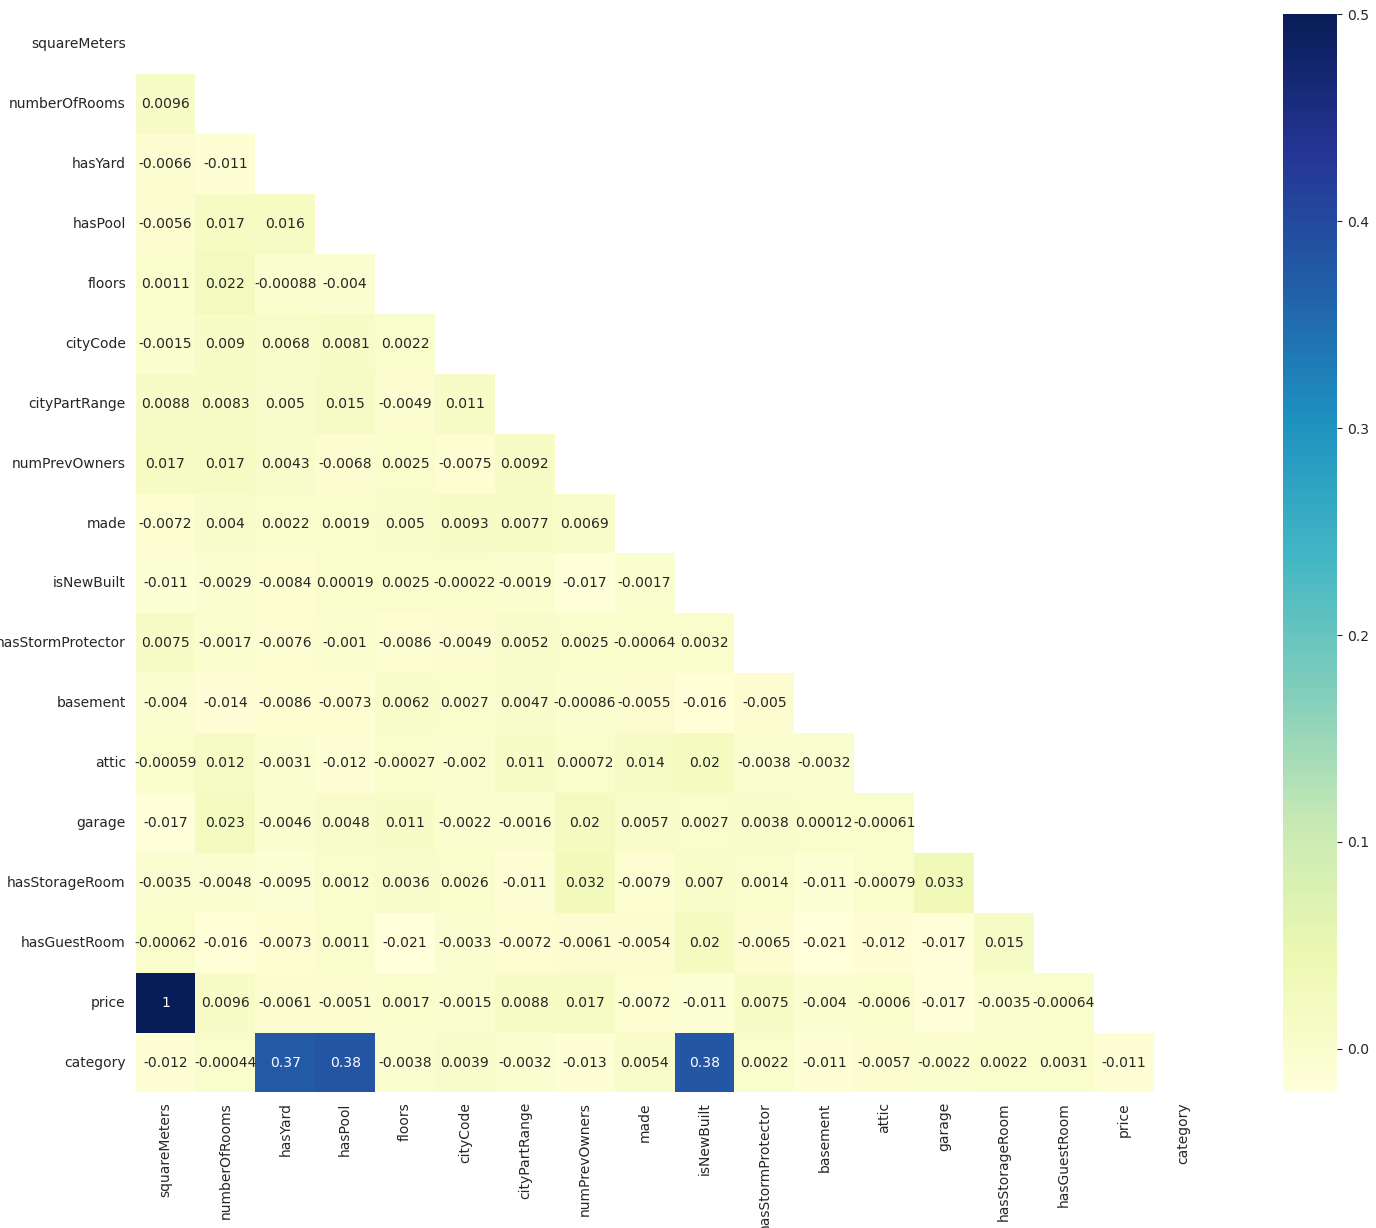

In [101]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 14))
    ax = sns.heatmap(df.corr(), mask=mask, vmax=.5, square=True,annot = True, cmap="YlGnBu")

In [102]:
x = df.drop("category" , axis = 1)
y = df.category
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [103]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=4,criterion='entropy')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


In [104]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [105]:
predictions=clf.predict(X_test)
predictions
## we have to check whether the predicted is accurate or not with the actual values


array([0, 0, 0, ..., 0, 0, 0])

In [106]:
clf.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

100.0

In [108]:
print("Unique labels in y_train:", y_train.unique())


Unique labels in y_train: [0 1]


In [110]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions,labels=[0,1])

array([[2619,    0],
       [   0,  381]], dtype=int64)

In [111]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, predictions, pos_label=1)
precision

1.0

In [112]:
from sklearn.metrics import recall_score
recall_score(y_test,predictions,pos_label=1)

1.0

In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions,target_names=['Basic','Luxury']))

              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      2619
      Luxury       1.00      1.00      1.00       381

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [115]:
feature_names=x.columns
feature_names

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [116]:
clf.feature_importances_,

(array([0.        , 0.        , 0.45500707, 0.25560791, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.28938501,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]),)

###### this above list is giving the the how important that corresponding feature to determin the result of your prediction

In [117]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
hasYard,0.455007
isNewBuilt,0.289385
hasPool,0.255608
squareMeters,0.000000
hasStormProtector,0.000000
hasGuestRoom,0.000000
hasStorageRoom,0.000000
garage,0.000000
attic,0.000000
basement,0.000000


In [118]:
features = list(feature_importance[feature_importance[0]>0].index)
features

['hasYard', 'isNewBuilt', 'hasPool']

<Axes: >

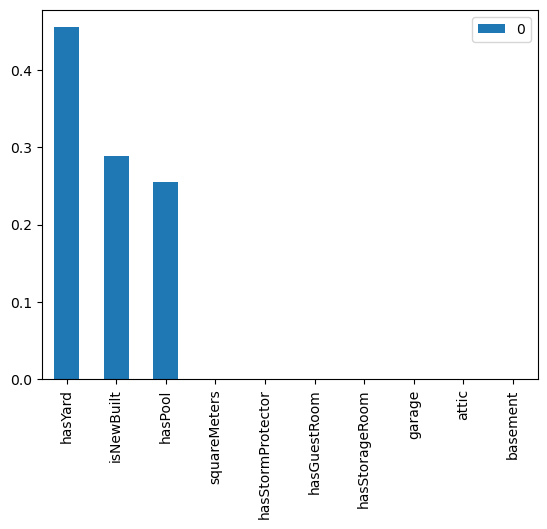

In [119]:
feature_importance.head(10).plot(kind='bar')

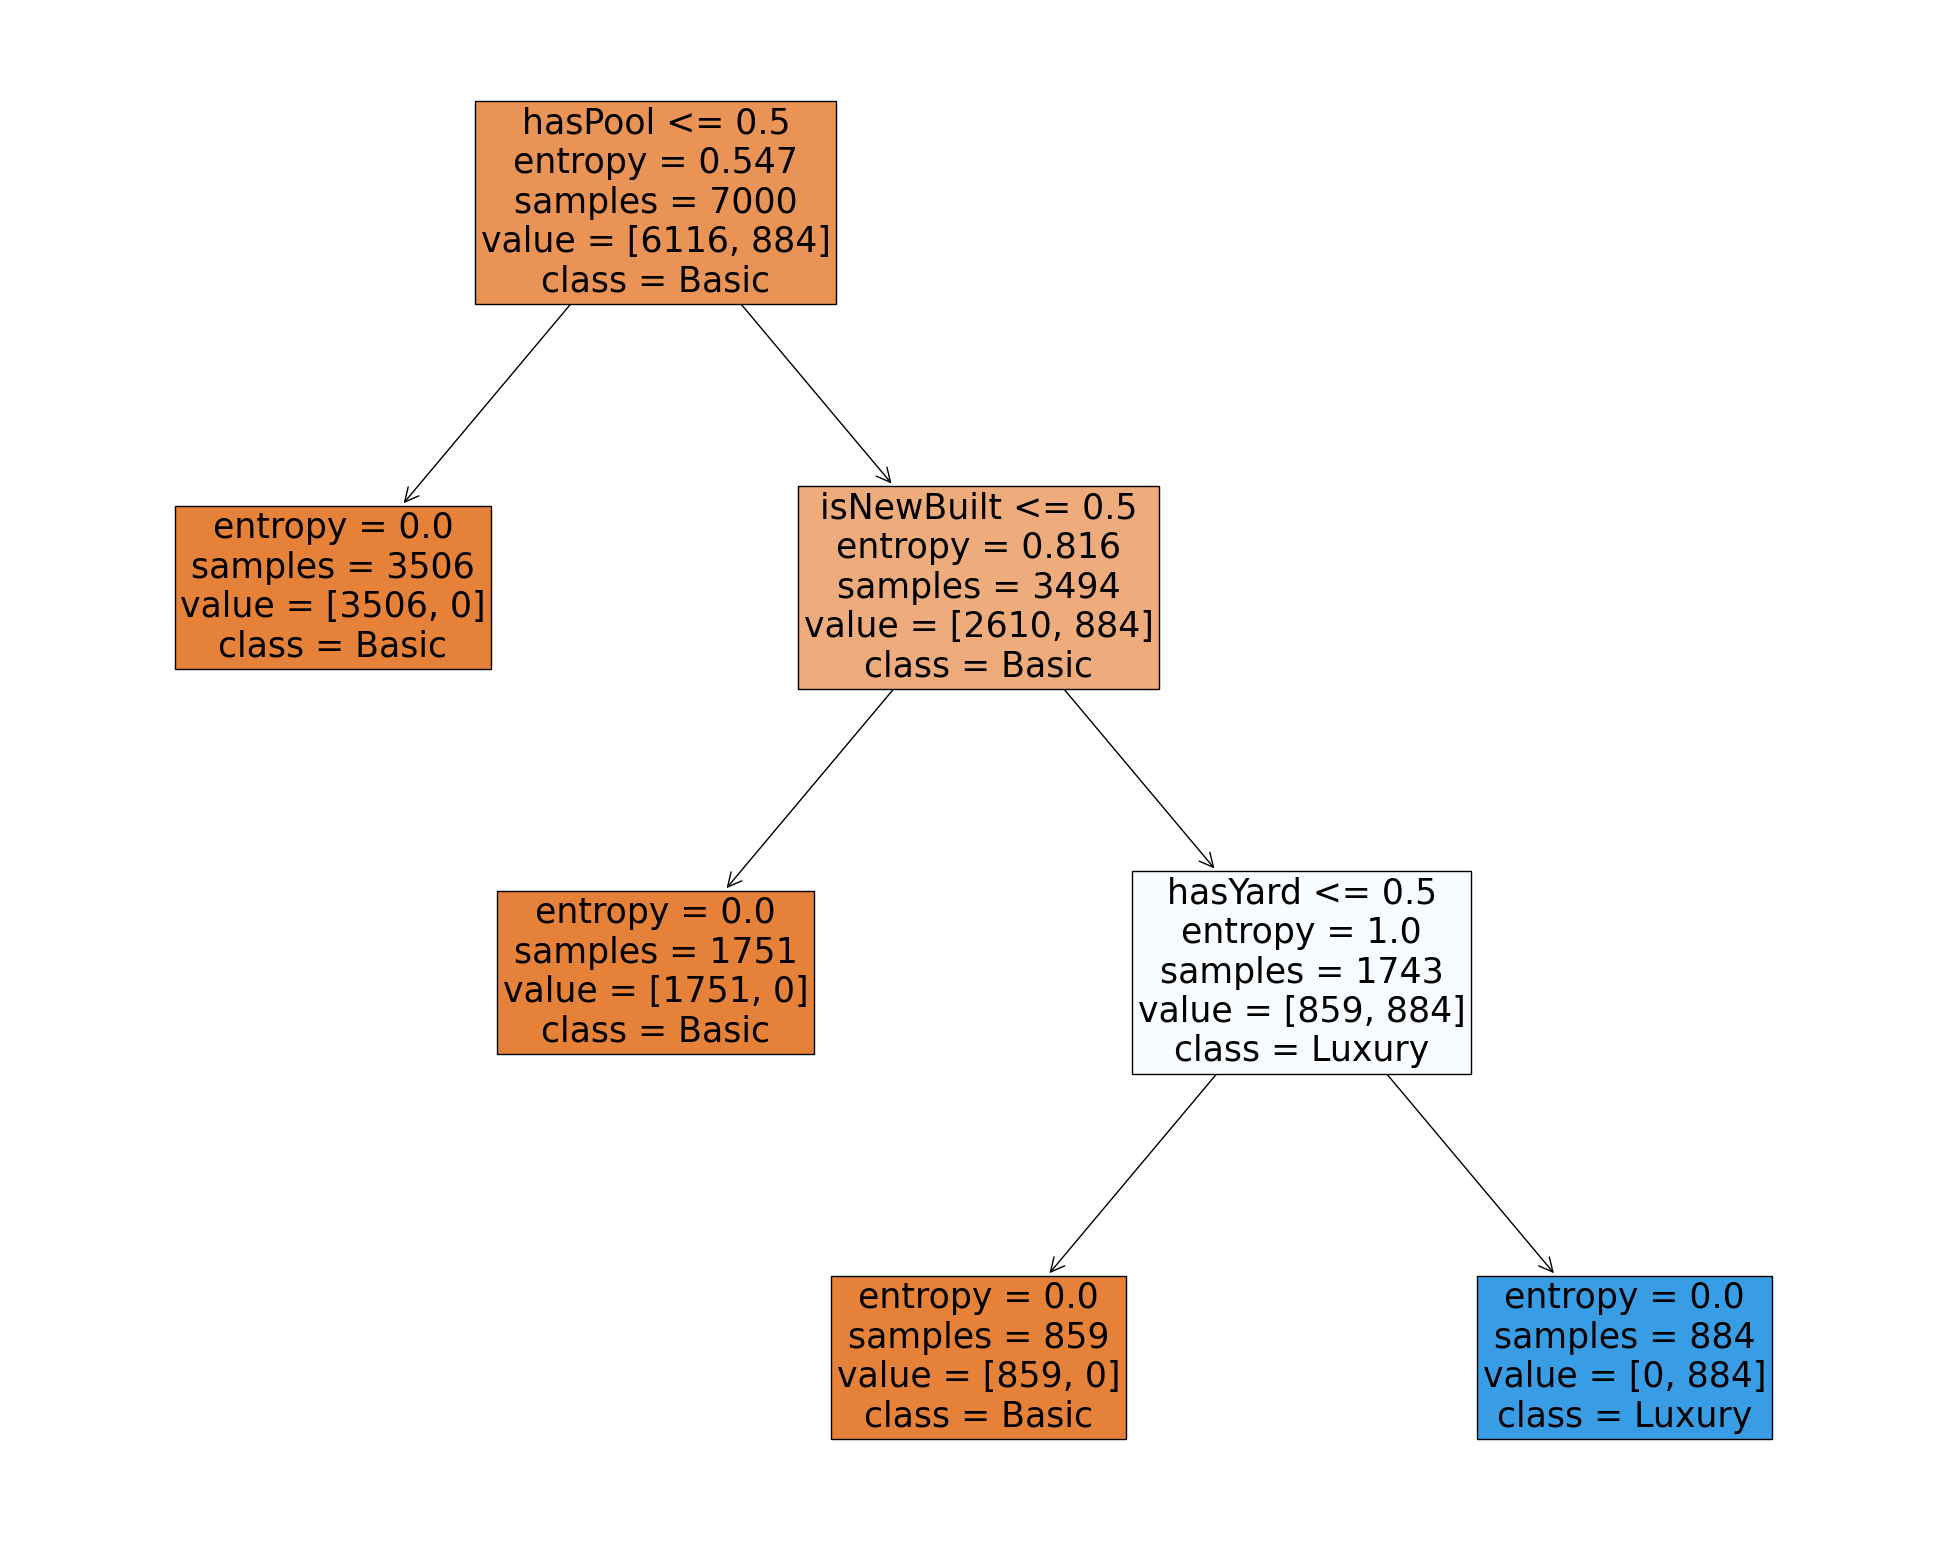

In [120]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_names,  
                   class_names={0:'Basic', 1:'Luxury'},
                   filled=True,
                  fontsize=25)

|--- hasPool <= 0.50
|   |--- class: 0
|--- hasPool >  0.50
|   |--- isNewBuilt <= 0.50
|   |   |--- class: 0
|   |--- isNewBuilt >  0.50
|   |   |--- hasYard <= 0.50
|   |   |   |--- class: 0
|   |   |--- hasYard >  0.50
|   |   |   |--- class: 1



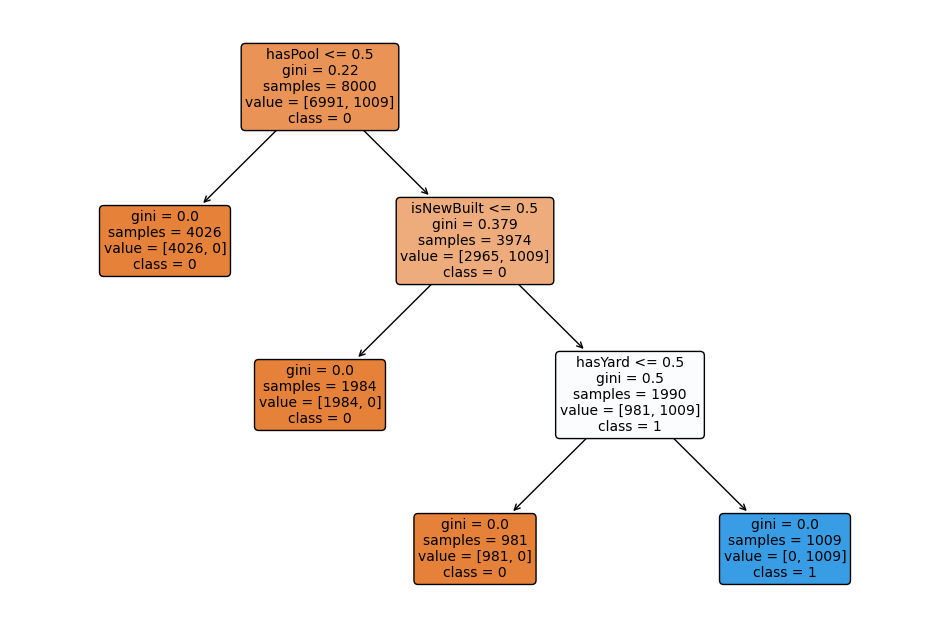

In [121]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named df

# Select relevant features and target variable
features = ['hasPool', 'isNewBuilt', 'hasYard']
target = 'category'

# Create a label encoder for the target variable
le = preprocessing.LabelEncoder()
df[target] = le.fit_transform(df[target])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Visualize the decision tree rules in text format
tree_rules = export_text(clf, feature_names=features)
print(tree_rules)

# Visualize the decision tree graphically
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=features, class_names=list(map(str, le.classes_)), filled=True, rounded=True, fontsize=10)
plt.show()

